In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Ganesha/Desktop/Sem 1/Datasets/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [4]:
df.dropna(how='any',inplace=True)

In [5]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

<AxesSubplot:ylabel='count'>

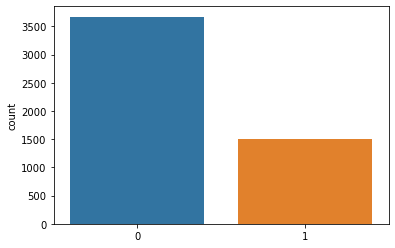

In [6]:
sns.countplot(x=y)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, plot_precision_recall_curve, plot_roc_curve
def report(classifier):
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
    display.plot()
    print(f"Accuracy Score : {accuracy_score(y_test, y_pred)}")
    print(f"Precision Score: {precision_score(y_test, y_pred)}")
    print(f"Recall Score: {recall_score(y_test, y_pred)}")
    plot_precision_recall_curve(classifier, x_test, y_test)
    plot_roc_curve(classifier, x_test, y_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Accuracy Score : 0.8638824439288476
Precision Score: 0.782608695652174
Recall Score: 0.7707808564231738


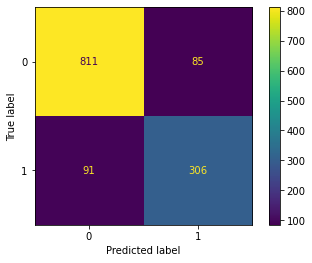

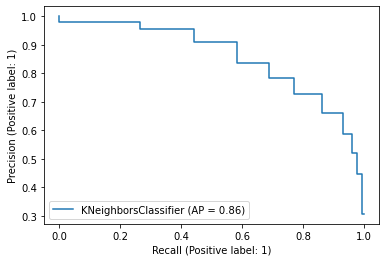

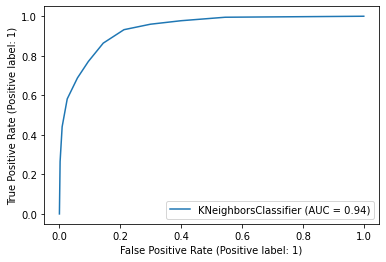

In [14]:
report(knn)

In [15]:
from sklearn.svm import SVC

svm = SVC(gamma='auto',random_state=10)
svm.fit(x_train, y_train)

SVC(gamma='auto', random_state=10)

Accuracy Score : 0.8917246713070379
Precision Score: 0.8882175226586103
Recall Score: 0.7405541561712846


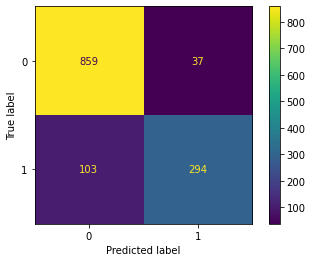

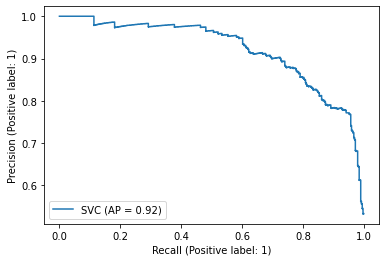

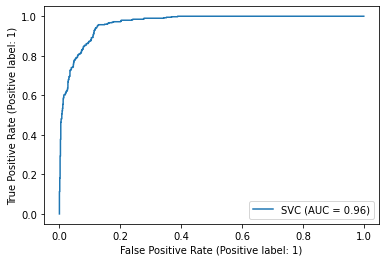

In [16]:
report(svm)